# Estudo sobre a Taxa de Distorção Idade-Série no Brasil (INEP, 2024)

A base de dados utilizada no estudo encontra-se disponível em: (https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/indicadores-educacionais/taxas-de-distorcao-idade-serie)


In [1]:
import pandas as pd
import numpy as np

tdis = pd.read_excel('datasets/TDI_BRASIL_REGIOES_UFS_2024.xlsx', skiprows=8)

tdis

c:\Users\caiob\Documents\Caio\SENAC\TADS038 1T - 3º Período\COMPET\DataScience\TDIS_Brasil_Compet\.venv\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,NU_ANO_CENSO,UNIDGEO,NO_CATEGORIA,NO_DEPENDENCIA,FUN_CAT_0,FUN_AI_CAT_0,FUN_AF_CAT_0,FUN_01_CAT_0,FUN_02_CAT_0,FUN_03_CAT_0,...,FUN_05_CAT_0,FUN_06_CAT_0,FUN_07_CAT_0,FUN_08_CAT_0,FUN_09_CAT_0,MED_CAT_0,MED_01_CAT_0,MED_02_CAT_0,MED_03_CAT_0,MED_04_CAT_0
0,2024,Brasil,Total,Total,10.9,7.1,15.7,2.1,4.2,8.1,...,11.1,15,15.9,16.2,15.6,17.8,20.4,17.6,14.7,29.4
1,2024,Brasil,Urbana,Total,10.1,6.7,14.4,2,4.1,7.7,...,10,13.7,14.7,15,14.3,17.2,19.9,16.9,13.9,29
2,2024,Brasil,Rural,Total,16.3,10.1,25.9,2.5,4.9,10.6,...,18.1,25.1,25.8,26.3,26.4,29.3,30.1,28.8,28.9,33.3
3,2024,Brasil,Total,Federal,9.8,4.4,12.1,1.8,3.1,5,...,5.3,7.7,12.9,13.3,13.8,17.4,16,15.8,19,30.3
4,2024,Brasil,Urbana,Federal,9.8,4.4,12.1,1.8,3.1,5,...,5.3,7.7,12.9,13.3,13.8,17.4,15.9,15.8,19,30.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,2024,Distrito Federal,Total,Pública,14,10.4,18.5,4.4,3.7,13.2,...,16.4,16.3,20.9,16.6,19.9,21.9,25.3,23.1,15.9,--
585,2024,Distrito Federal,Urbana,Pública,13.9,10.3,18.3,4.6,3.5,13.1,...,16.3,16,20.8,16.5,19.6,21.7,25.2,23,15.7,--
586,2024,Distrito Federal,Rural,Pública,15,11.4,22.2,2.9,6.2,15.3,...,17.6,21.1,22.2,18.6,26.5,25.6,28.9,25.8,20.9,--
587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
tdis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   NU_ANO_CENSO    588 non-null    object
 1   UNIDGEO         587 non-null    object
 2   NO_CATEGORIA    587 non-null    object
 3   NO_DEPENDENCIA  587 non-null    object
 4   FUN_CAT_0       587 non-null    object
 5   FUN_AI_CAT_0    587 non-null    object
 6   FUN_AF_CAT_0    587 non-null    object
 7   FUN_01_CAT_0    587 non-null    object
 8   FUN_02_CAT_0    587 non-null    object
 9   FUN_03_CAT_0    587 non-null    object
 10  FUN_04_CAT_0    587 non-null    object
 11  FUN_05_CAT_0    587 non-null    object
 12  FUN_06_CAT_0    587 non-null    object
 13  FUN_07_CAT_0    587 non-null    object
 14  FUN_08_CAT_0    587 non-null    object
 15  FUN_09_CAT_0    587 non-null    object
 16  MED_CAT_0       587 non-null    object
 17  MED_01_CAT_0    587 non-null    object
 18  MED_02_CAT

## Preparando os dados para análise

*Obs.: Todas as colunas estão sendo identificadas como 'Object'*. No entanto, vamos primeiramente selecionar quais as colunas são úteis para o presente estudo. Como não há registros para o Ensino Infantil nos dados, faz-se pertinente a análise comparativa dos anos iniciais e finais do Ensino Fundamental. Deste modo, foram selecionadas as colunas: 'Unidades Geográfica', 'Localização', 'Dependência Administrativa', 'Anos iniciais EF', 'Anos finais EF', 'Total Fundamental' e 'Total Médio'.

In [3]:
tdis = tdis.iloc[:, [1, 2, 3, 4, 5, 6, 16]]
colunas = ['ug', 'loc', 'da', 'aief', 'afef', 'tef', 'tem']
tdis.columns = colunas

In [4]:
for i, col in enumerate(tdis.columns):
    print(f"{i}: '{col}'")


0: 'ug'
1: 'loc'
2: 'da'
3: 'aief'
4: 'afef'
5: 'tef'
6: 'tem'


In [5]:
tdis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ug      587 non-null    object
 1   loc     587 non-null    object
 2   da      587 non-null    object
 3   aief    587 non-null    object
 4   afef    587 non-null    object
 5   tef     587 non-null    object
 6   tem     587 non-null    object
dtypes: object(7)
memory usage: 32.3+ KB


Vamos considerar que os valores ausentes indicam que o dado não foi coletado. Assim, vamos substituir os valores ausentes por zero. Isso é uma suposição, mas é uma abordagem comum em análise de dados quando não se tem certeza do que fazer com os valores ausentes.

In [6]:
df = tdis.replace('--', 0)

C:\Users\caiob\AppData\Local\Temp\ipykernel_8616\1355435594.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = tdis.replace('--', 0)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ug      587 non-null    object 
 1   loc     587 non-null    object 
 2   da      587 non-null    object 
 3   aief    587 non-null    float64
 4   afef    587 non-null    float64
 5   tef     587 non-null    float64
 6   tem     587 non-null    float64
dtypes: float64(4), object(3)
memory usage: 32.3+ KB


É possível notar que agora os tipos das colunas não são lidos apenas como objetos, mas como números que permitirão a análise comparativa dos dados.

Dicionário das siglas utilizadas:
- ug: Unidade Geográfica
- loc: localicação
- da: Dependência Administrativa
- aief: Anos iniciais Ensino Fundamental
- afef: Anos finais Ensino Fundamental
- tef: Total Ensino Fundamental
- tem: Total Ensino Médio

In [8]:
tdis

,ug,loc,da,aief,afef,tef,tem
0,Brasil,Total,Total,10.9,7.1,15.7,17.8
1,Brasil,Urbana,Total,10.1,6.7,14.4,17.2
2,Brasil,Rural,Total,16.3,10.1,25.9,29.3
3,Brasil,Total,Federal,9.8,4.4,12.1,17.4
4,Brasil,Urbana,Federal,9.8,4.4,12.1,17.4
...,...,...,...,...,...,...,...
584,Distrito Federal,Total,Pública,14,10.4,18.5,21.9
585,Distrito Federal,Urbana,Pública,13.9,10.3,18.3,21.7
586,Distrito Federal,Rural,Pública,15,11.4,22.2,25.6
587,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.groupby('ug')['aief'].median()


ug
Acre                   14.90
Alagoas                12.60
Amapá                  22.60
Amazonas               12.10
Bahia                  19.85
Brasil                 11.55
Ceará                   5.40
Centro-Oeste            9.80
Distrito Federal       11.20
Espírito Santo         11.10
Goiás                   9.85
Maranhão               13.95
Mato Grosso             5.45
Mato Grosso do Sul     17.45
Minas Gerais            6.60
Nordeste               14.20
Norte                  16.05
Paraná                  7.65
Paraíba                14.15
Pará                   20.80
Pernambuco             12.55
Piauí                  12.85
Rio Grande do Norte    18.95
Rio Grande do Sul      12.65
Rio de Janeiro         18.45
Rondônia                8.60
Roraima                15.80
Santa Catarina          8.95
Sergipe                17.65
Sudeste                 8.50
Sul                     9.70
São Paulo               4.40
Tocantins               8.35
Name: aief, dtype: float64

In [11]:
df.groupby('ug')['aief'].mean()

ug
Acre                   17.488235
Alagoas                11.188235
Amapá                  21.494118
Amazonas               12.483333
Bahia                  19.155556
Brasil                 11.038889
Ceará                   6.038889
Centro-Oeste            9.350000
Distrito Federal        9.786667
Espírito Santo          8.844444
Goiás                   8.933333
Maranhão               16.227778
Mato Grosso             5.016667
Mato Grosso do Sul     15.138889
Minas Gerais            6.600000
Nordeste               14.433333
Norte                  15.205556
Paraná                  7.061111
Paraíba                14.661111
Pará                   18.250000
Pernambuco             12.733333
Piauí                  10.933333
Rio Grande do Norte    15.438889
Rio Grande do Sul      10.516667
Rio de Janeiro         17.827778
Rondônia                8.755556
Roraima                13.288889
Santa Catarina          8.344444
Sergipe                14.527778
Sudeste                 7.861111
Sul    

In [12]:
df.groupby('ug')['aief'].max()

ug
Acre                   39.8
Alagoas                25.3
Amapá                  56.7
Amazonas               25.3
Bahia                  34.3
Brasil                 20.9
Ceará                  10.8
Centro-Oeste           14.6
Distrito Federal       15.0
Espírito Santo         14.8
Goiás                  15.6
Maranhão               53.2
Mato Grosso            11.0
Mato Grosso do Sul     28.0
Minas Gerais           10.9
Nordeste               29.5
Norte                  32.8
Paraná                 12.5
Paraíba                28.4
Pará                   34.1
Pernambuco             21.8
Piauí                  23.8
Rio Grande do Norte    27.5
Rio Grande do Sul      13.8
Rio de Janeiro         35.8
Rondônia               35.8
Roraima                26.5
Santa Catarina         15.4
Sergipe                20.5
Sudeste                11.0
Sul                    13.1
São Paulo               6.7
Tocantins              22.3
Name: aief, dtype: float64

In [13]:
df.groupby('ug')[['aief','afef']].median().round(2)

,aief,afef
ug,,
Acre,14.90,13.20
Alagoas,12.60,4.80
Amapá,22.60,16.90
Amazonas,12.10,8.15
Bahia,19.85,12.65
Brasil,11.55,6.90
Ceará,5.40,2.65
Centro-Oeste,9.80,8.10
Distrito Federal,11.20,8.20


In [15]:
df.groupby('ug')[['tef', 'tem']].median().round(2)

,tef,tem
ug,,
Acre,25.40,19.20
Alagoas,18.50,21.50
Amapá,32.20,32.00
Amazonas,16.70,18.15
Bahia,30.10,29.50
Brasil,15.10,18.45
Ceará,8.40,13.20
Centro-Oeste,14.15,15.95
Distrito Federal,15.10,21.90


In [16]:
df.groupby('loc')[['aief', 'afef', 'tef', 'tem']].median().round(2)

,aief,afef,tef,tem
loc,,,,
Rural,11.1,6.9,17.5,21.1
Total,10.9,6.7,14.6,16.4
Urbana,10.9,6.2,14.1,16.3


In [18]:
df.groupby(['ug', 'loc'])[['aief', 'afef', 'tef', 'tem']].median().round(2)

aief   afef    tef    tem
ug        loc                               
Acre      Rural   33.80  25.60  44.60  44.20
          Total   20.15  15.70  25.70  17.60
          Urbana  14.00  10.45  17.20  14.80
Alagoas   Rural    9.30   4.70  17.00  23.30
          Total   12.75   7.90  18.85  18.95
...                 ...    ...    ...    ...
São Paulo Total    4.65   2.70   7.30   9.10
          Urbana   4.65   2.70   7.30   9.10
Tocantins Rural   12.90   7.15  21.40  20.40
          Total    7.85   4.90  13.45  14.20
          Urbana   7.15   4.35  12.00  13.25

[99 rows x 4 columns]

In [19]:
df.groupby(['ug', 'loc', 'da'])[['aief', 'afef', 'tef', 'tem']].median().round(2)

aief  afef   tef   tem
ug        loc    da                               
Acre      Rural  Estadual   39.8  31.0  44.9  46.4
                 Federal     0.0   0.0   0.0   9.7
                 Municipal  27.4  23.0  43.6   0.0
                 Pública    33.8  25.6  44.6  44.2
                 Total      33.8  25.6  44.6  44.2
...                          ...   ...   ...   ...
Tocantins Urbana Federal     0.0   0.0   0.0   9.8
                 Municipal   6.3   4.8  11.9   0.0
                 Privada     2.7   2.4   3.2   4.7
                 Pública     8.7   4.8  13.1  17.5
                 Total       8.0   4.5  12.1  16.7

[587 rows x 4 columns]

In [21]:
pd.pivot_table(df, values="tef", index="ug", columns='da', aggfunc="median").round(2)


da,Estadual,Federal,Municipal,Privada,Pública,Total
ug,,,,,,
Acre,25.4,12.8,39.3,2.7,27.2,26.0
Alagoas,27.2,0.0,19.2,7.5,20.7,18.5
Amapá,32.2,0.0,36.2,4.7,32.5,30.0
Amazonas,15.5,6.8,26.3,5.8,21.5,20.5
Bahia,33.1,13.0,30.3,9.1,30.6,27.2
Brasil,14.5,12.1,20.9,4.9,17.9,15.7
Ceará,13.8,10.2,8.4,6.1,8.5,8.1
Centro-Oeste,14.2,5.3,18.8,4.4,15.2,13.5
Distrito Federal,18.7,4.5,NaN,5.7,18.5,15.1


## Visualização dos Dados

**Gráfico de barras (barra horizontal)**

Média das taxas por etapa de ensino e dependência administrativa

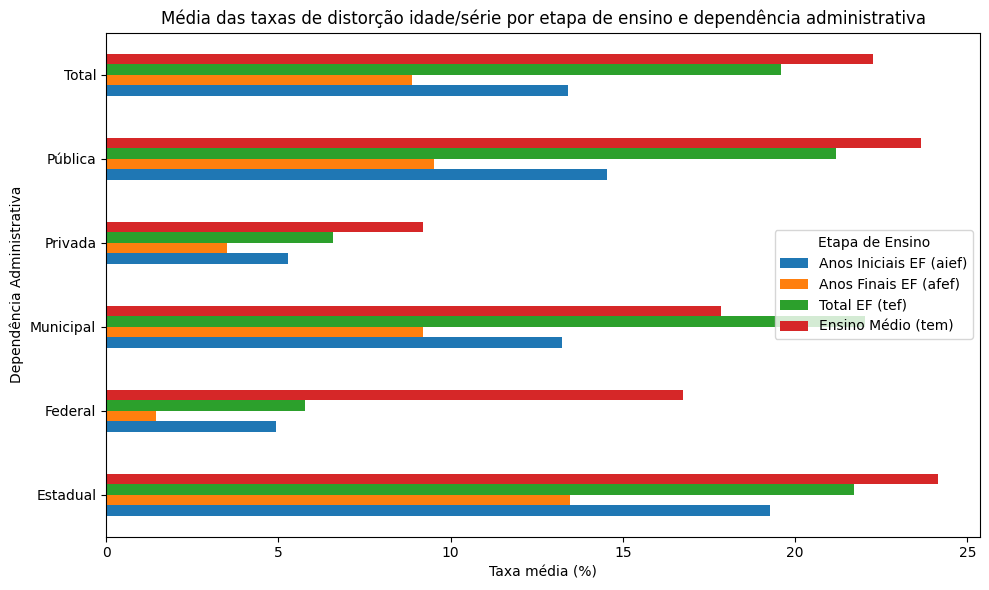

In [27]:
import matplotlib.pyplot as plt

# Agrupamento e cálculo da média
df_grouped = df.groupby("da")[["aief", "afef", "tef", "tem"]].mean()

# Plotagem
ax = df_grouped.plot(kind="barh", figsize=(10, 6))

# Título e rótulos
plt.title("Média das taxas de distorção idade/série por etapa de ensino e dependência administrativa", fontsize=12)
plt.xlabel("Taxa média (%)")
plt.ylabel("Dependência Administrativa")

# Legenda personalizada
plt.legend(
    title="Etapa de Ensino",
    labels=[
        "Anos Iniciais EF (aief)",
        "Anos Finais EF (afef)",
        "Total EF (tef)",
        "Ensino Médio (tem)"
    ],
    loc="center right"
)

# Ajuste do layout para não cortar textos
plt.tight_layout()

# Exibir o gráfico
plt.show()


**Gráfico de Colunas Agrupadas**

Comparar múltiplas variáveis por categoria

Média das taxas de distorção idade/série por localização e etapa de ensino

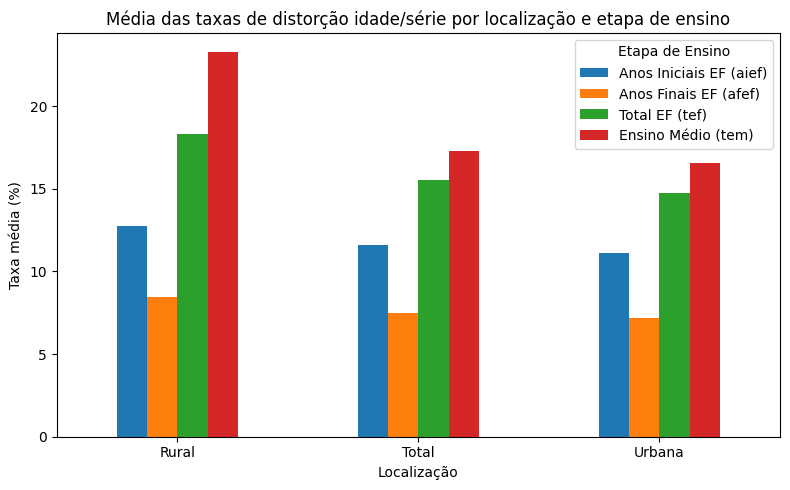

In [24]:
# Agrupamento e cálculo da média
df_grouped = df.groupby("loc")[["aief", "afef", "tef", "tem"]].mean()

# Plotagem
ax = df_grouped.plot(kind="bar", figsize=(8, 5))

# Título e rótulos dos eixos
plt.title("Média das taxas de distorção idade/série por localização e etapa de ensino", fontsize=12)
plt.ylabel("Taxa média (%)")
plt.xlabel("Localização")

# Legenda descritiva
plt.legend(
    title="Etapa de Ensino",
    labels=[
        "Anos Iniciais EF (aief)",
        "Anos Finais EF (afef)",
        "Total EF (tef)",
        "Ensino Médio (tem)"
    ],
    loc="upper right"
)

# Ajustar layout para melhor visualização
plt.xticks(rotation=0)
plt.tight_layout()

# Exibir gráfico
plt.show()


**Gráfico de Pizza**

Distribuição percentual por Dependência Administrativa

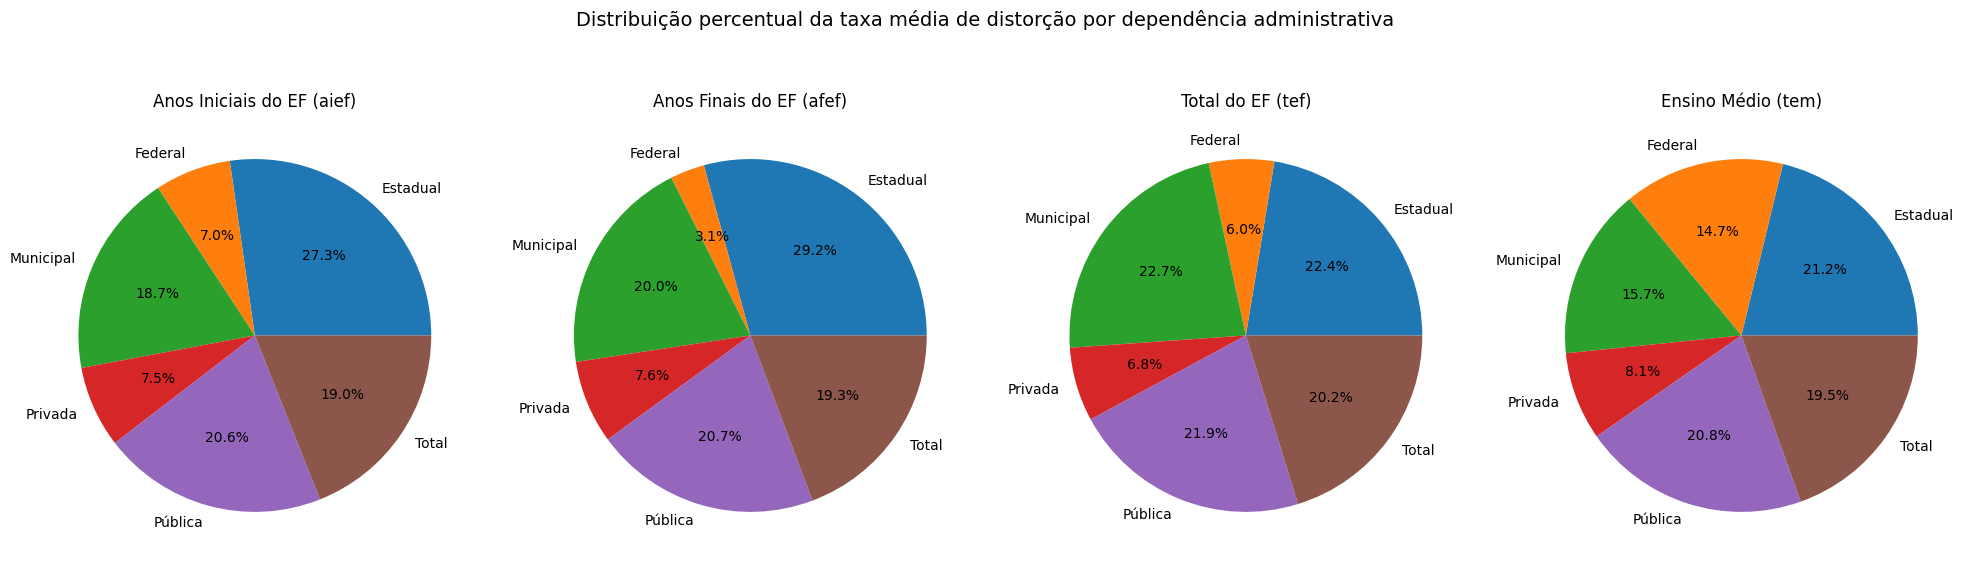

In [25]:
# Preparar os dados: média por dependência administrativa (da)
dados = df.groupby("da")[["aief", "afef", "tef", "tem"]].mean()

# Criar subplots lado a lado (1 linha, 4 colunas)
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# Títulos para cada gráfico
titulos = [
    "Anos Iniciais do EF (aief)",
    "Anos Finais do EF (afef)",
    "Total do EF (tef)",
    "Ensino Médio (tem)"
]

# Colunas correspondentes
colunas = ["aief", "afef", "tef", "tem"]

# Gerar os gráficos de pizza
for i, col in enumerate(colunas):
    dados[col].plot.pie(
        ax=axes[i],
        autopct="%1.1f%%",
        ylabel="",
        title=titulos[i]
    )

# Ajustar layout para melhor visualização
plt.suptitle("Distribuição percentual da taxa média de distorção por dependência administrativa", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Deixar espaço para o título principal
plt.show()



In [26]:
df

,ug,loc,da,aief,afef,tef,tem
0,Brasil,Total,Total,10.9,7.1,15.7,17.8
1,Brasil,Urbana,Total,10.1,6.7,14.4,17.2
2,Brasil,Rural,Total,16.3,10.1,25.9,29.3
3,Brasil,Total,Federal,9.8,4.4,12.1,17.4
4,Brasil,Urbana,Federal,9.8,4.4,12.1,17.4
...,...,...,...,...,...,...,...
584,Distrito Federal,Total,Pública,14.0,10.4,18.5,21.9
585,Distrito Federal,Urbana,Pública,13.9,10.3,18.3,21.7
586,Distrito Federal,Rural,Pública,15.0,11.4,22.2,25.6
587,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.to_csv("tdi-mod.csv", sep=";", decimal=",")